## Observations and Insights 

Observations
In looking at the boxplots, it seems that Infubinol and Ceftamin have much higher tumor volumes than the other two most promising drugs, Ramicane and Capomulin. There is barely an overlap with the very bottom of the box plots with the very top of the other two boxplots. This tells me that in terms of tumor volume, Ramicane and Capomulin would most likely be the top 2 most promising drugs give that their tumor volumes are much lower all around.

Looking further into Capomulin, it's easy to see that this drug had a steady decrease in tumor volume over the time period. It was just about a 10 unit (mm3) decrease in tumor volume. I would expect that it would continue to decrease if the time was extended and more data was provided. 

As might be expected, there is a stong positive correlation between tumor volume and mouse weight. The larger the tumor (more volume of a tumor) the more a mouse weighs. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')

#displaying data to see what it contains
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame. (1893)
len(combined['Mouse ID'])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
#Number of mice without duplicates (249)
len(combined['Mouse ID'].unique())

249

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined[combined['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

drug_group = clean_combined.groupby('Drug Regimen')

tumorvol_mean = round(drug_group.mean()['Tumor Volume (mm3)'],2)

tumorvol_median = round(drug_group.median()['Tumor Volume (mm3)'],2)

tumorvol_var = round(drug_group.var()['Tumor Volume (mm3)'],2)

tumorvol_stdev = round(drug_group.std()['Tumor Volume (mm3)'],2)

tumorvol_sem = round(drug_group.sem()['Tumor Volume (mm3)'],2)

sum_stats = pd.DataFrame({"Mean Tumor Volume":tumorvol_mean, "Median Tumor Volume":tumorvol_median, 
                          "Tumor Volume Variance":tumorvol_var, "St Dev Tumor Volume":tumorvol_stdev,
                                 "SEM of Tumor Volume":tumorvol_sem})
sum_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,St Dev Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

sum_stats = clean_combined.groupby('Drug Regimen').agg(\
        tumorvol_mean=('Tumor Volume (mm3)', np.mean),\
        tumorvol_median=('Tumor Volume (mm3)', np.median),\
        tumorvol_var=('Tumor Volume (mm3)', np.var),\
        tumorvol_stdev=('Tumor Volume (mm3)', np.std),\
        tumorvol_sem=('Tumor Volume (mm3)', st.sem)\
).round(2)

sum_stats

C:\Users\megan.moroney\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\megan.moroney\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\megan.moroney\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tumorvol_mean,tumorvol_median,tumorvol_var,tumorvol_stdev,tumorvol_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

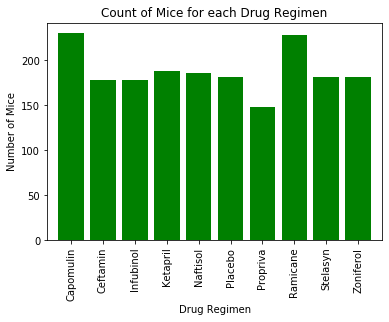

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#creating dataframe to use grouped by the drug regimen
drug_regimen = clean_combined.groupby('Drug Regimen')

#creating dataframe with the count 
drug_regimen_count = pd.DataFrame(drug_regimen['Drug Regimen'].count())

#setting x_axis and tick locations
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]

# creating chart
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color ='green', align ="center")
plt.xticks(tick_locations, list(drug_regimen_count.index), rotation ="vertical")

#setting x/y limits
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.05)

#labeling graph
plt.title("Count of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

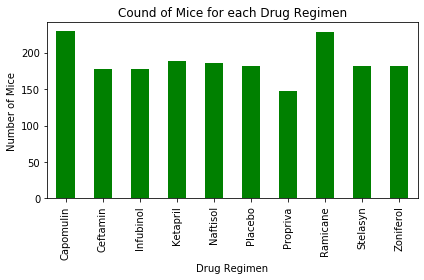

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
#creating dataframe to use grouped by the drug regimen
drug_regimen = clean_combined.groupby('Drug Regimen')

#creating dataframe with the count 
drug_regimen_count = pd.DataFrame(drug_regimen['Drug Regimen'].count())

#creating bar chart
drug_regimen_bar = drug_regimen_count.plot(kind='bar', title = "Cound of Mice for each Drug Regimen", color ="green", legend=None)

#labeling the chart
drug_regimen_bar.set_xlabel("Drug Regimen")
drug_regimen_bar.set_ylabel("Number of Mice")
plt.tight_layout()

plt.show()


## Pie Plots

In [11]:
#splitting up gender into it's own dataframe using cleaned dataframe
gender = clean_combined.groupby('Sex')

#getting count per gender and creating dataframe
gender_count = pd.DataFrame(gender['Sex'].count())
gender_count.head()

,Sex
Sex,
Female,922
Male,958


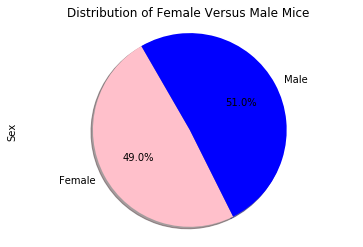

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind='pie', y='Sex', \
                        title="Distribution of Female Versus Male Mice",startangle=120,\
                        autopct='%1.1f%%',shadow=True, colors =["pink","blue"],legend =False)
plt.axis("equal")
plt.show()

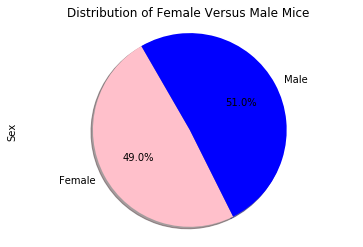

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#setting colors
colors = ['pink', 'blue']

#labels
gender = list(gender_count.index.values)

#values for the data in the pie chart
gender_count_plt = gender_count['Sex']

plt.pie(gender_count_plt, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

#subset of data for 4 treatment regimens
four_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#getting sliced dataframe using list of 4 regimens above
four_regimens = clean_combined[clean_combined['Drug Regimen'].isin(four_regimens_list)]

four_regimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
#group by mouse ID and last tumor volume rounding to 2

last_tumor = four_regimens.groupby(['Drug Regimen','Mouse ID']).agg(\
            last_tumor=('Tumor Volume (mm3)', lambda x:x.iloc[-1])).round(2)

last_tumor

last_tumor
Drug Regimen Mouse ID            
Capomulin    b128           38.98
             b742           38.94
             f966           30.49
             g288           37.07
             g316           40.16
...                           ...
Ramicane     s508           30.28
             u196           40.67
             w678           43.17
             y449           44.18
             z578           30.64

[100 rows x 1 columns]

In [16]:
#have to unstack the dataframe in order to use for box plots
last_tumor_unstack = last_tumor.stack(level=0).unstack(level=0)
last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,last_tumor,NaN,NaN,67.97,NaN
a251,last_tumor,NaN,NaN,65.53,NaN
a275,last_tumor,NaN,63.0,NaN,NaN
a411,last_tumor,NaN,NaN,NaN,38.41
a444,last_tumor,NaN,NaN,NaN,43.05


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# setting up for loop to calculate these for all drugs

counter = 0
for drug in four_regimens_list:
    quartiles = last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq - (1.5*iqr),2)
    
# for first time through loop we can print out values for above calculations so we know what they are
    if counter == 0:
        print(f"----------------------------------------------")
    print(f"The lower quartile of {drug} is {lowerq}")
    print(f"The upper quartile of {drug} is {upperq}")
    print(f"The interquartile range of {drug} is {iqr}")
    print(f"The median of {drug} is {quartiles[.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"----------------------------------------------")

        
    counter +=1

        

----------------------------------------------
The lower quartile of Capomulin is 32.38
The upper quartile of Capomulin is 40.16
The interquartile range of Capomulin is 7.78
The median of Capomulin is 38.13
Values below 20.71 could be outliers.
Values above 28.49 could be outliers.
----------------------------------------------
The lower quartile of Ramicane is 31.56
The upper quartile of Ramicane is 40.66
The interquartile range of Ramicane is 9.1
The median of Ramicane is 36.56
Values below 17.91 could be outliers.
Values above 27.01 could be outliers.
----------------------------------------------
The lower quartile of Infubinol is 54.05
The upper quartile of Infubinol is 65.53
The interquartile range of Infubinol is 11.48
The median of Infubinol is 60.17
Values below 36.83 could be outliers.
Values above 48.31 could be outliers.
----------------------------------------------
The lower quartile of Ceftamin is 48.72
The upper quartile of Ceftamin is 64.3
The interquartile range of Ce

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# I'm going to remove NaN values to clean this up a bit

box_list = []
for drug in four_regimens_list:
    box_list.append(list(last_tumor_unstack[drug].dropna()))


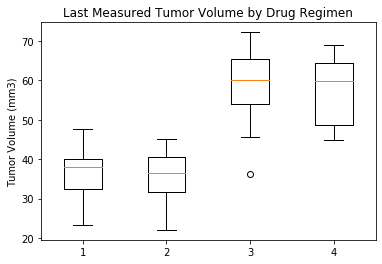

In [19]:
# creating boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Last Measured Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(box_list)
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#dataframe for only capomulin regimen
capomulin_regimen = clean_combined.loc[clean_combined['Drug Regimen']=='Capomulin']
capomulin_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [21]:
#grouping by timepoint with mean of tumor volume
tumorvol_time = capomulin_regimen.groupby(['Timepoint']).agg(\
                tumorvol_mean =('Tumor Volume (mm3)', np.mean)\
                                                            ).round(2)
tumorvol_time

,tumorvol_mean
Timepoint,
0,45.00
5,44.27
10,43.08
15,42.06
20,40.72
25,39.94
30,38.77
35,37.82
40,36.96


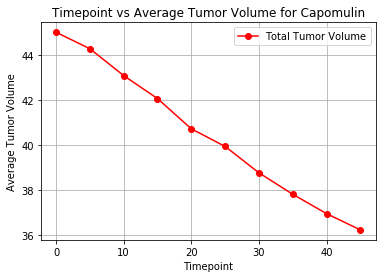

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = list(tumorvol_time.index.values)

plt.plot(x_axis, tumorvol_time, marker="o", color='red', label="Total Tumor Volume")
plt.legend(loc="best")
plt.grid(True)
plt.title("Timepoint vs Average Tumor Volume for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Average Tumor Volume")
plt.show()

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_cap = capomulin_regimen.groupby(['Mouse ID']).agg(\
            weight = ('Weight (g)', np.mean),\
            tumorvol_mean =('Tumor Volume (mm3)', np.mean)\
                                                       ).round(2)
mouse_cap

,weight,tumorvol_mean
Mouse ID,,
b128,22,41.96
b742,21,40.08
f966,17,36.51
g288,19,41.99
g316,22,44.61
i557,24,44.81
i738,20,39.14
j119,23,44.47
j246,21,43.22


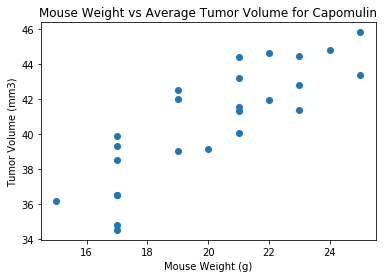

In [24]:
#creating scatterplot from above dataframe
plt.scatter(mouse_cap['weight'], mouse_cap['tumorvol_mean'], marker='o')

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for Capomulin 
correlation_coefficient = st.pearsonr(mouse_cap['weight'], mouse_cap['tumorvol_mean'])
print(f"The correlation between mouse weight (g) and tumor volume (mm3) is {round(correlation_coefficient[0],2)}")

The correlation between mouse weight (g) and tumor volume (mm3) is 0.84


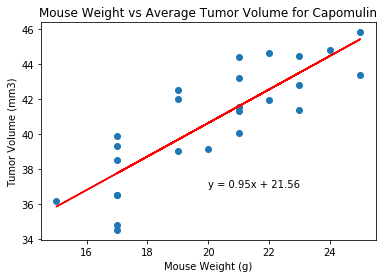

In [26]:
x_axis = mouse_cap['weight']
y_axis = mouse_cap['tumorvol_mean']
(slope, intercept, rvalue, pvalue,stderr) = st.linregress(x_axis, y_axis)
regression = x_axis*slope +intercept
line_equation=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regression,"r-")
plt.annotate(line_equation, (20, 37))
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()